In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import glob

In [ ]:
#LBP Images Directories
# lbpTrainingDir = '/content/drive/My Drive/Advanced Computer Vision/LBP/TrainLBP'

# lbpTrainingLabel = '/content/drive/My Drive/Advanced Computer Vision/Labels/trainLabels.txt'

trainFolder = '/content/drive/My Drive/COVID-CT/LBP/TrainLBP'


In [ ]:
# trainDataLBP = []
# trainLabel = [] #temporary storage
# trainLabelLBP = []

INIT_LR = 1e-3
EPOCHS = 25
BS = 8

In [ ]:
# def create_dataset(img_dir_for_read, mode):
#     data_path = os.path.join(img_dir_for_read,'*g')
#     files = glob.glob(data_path)
#     print(len(files))
#     for fileName in files:
#         image = cv2.imread(fileName)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         image = cv2.resize(image, (224, 224))
#         if mode in 'train':
#             trainDataLBP.append(image)
#         elif mode in 'validation':
#             valDataLBP.append(image)
#         elif mode in 'test':
#             testDataLBP.append(image)

In [ ]:
# create_dataset(lbpTrainingDir,'train')
#trainData

419


In [ ]:
# f = open(lbpTrainingLabel, "r")

# for i in f.readlines():
#     label = list(i.split("\n"))
#     trainLabel.append(label[0])
    
# for val in trainLabel:
#     trainLabelLBP.append(int(float(val)))
    

In [ ]:
# trainDataLBP = np.array(trainDataLBP) / 255.0
# trainLabelLBP  = np.array(trainLabelLBP)

In [ ]:
# print(len(trainDataLBP))
# print(len(trainLabelLBP))

419
419


In [ ]:
# lb = LabelBinarizer()
# trainLabelLBP = lb.fit_transform(trainLabelLBP)
# trainLabelLBP = to_categorical(trainLabelLBP)
# trainLabelLBP

In [ ]:
# trainX, testX, trainY, testY = train_test_split(trainDataLBP, trainLabelLBP, shuffle=True, test_size=0.20, random_state=42)


In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# trainAug = ImageDataGenerator(
#     trainFolder,
#     #rotation_range=15, 
#     fill_mode="nearest")

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BS,
                                                           directory = trainFolder,
                                                           shuffle=True,
                                                           target_size=(255, 255),
                                                           class_mode='categorical',
                                                           subset='training')

validation_data_gen = train_image_generator.flow_from_directory(batch_size=BS,
                                                           directory = trainFolder,
                                                           shuffle=True,
                                                           target_size=(255, 255),
                                                           class_mode='categorical',
                                                           subset='validation')

Found 336 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


In [ ]:
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
# H = model.fit(trainAug.flow(trainX, trainY, batch_size=BS), steps_per_epoch=len(trainX)/10, validation_data=(testX, testY), validation_steps=len(testX)/10, epochs=10)
H = model.fit(train_data_gen, steps_per_epoch=train_data_gen.samples//BS, validation_data=validation_data_gen, validation_steps=validation_data_gen.samples//BS, epochs = EPOCHS)


[INFO] compiling model...
[INFO] training head...
Epoch 1/25
42/42 [==============================] - 303s 7s/step - loss: 0.6712 - accuracy: 0.6250 - val_loss: 0.7534 - val_accuracy: 0.4500
Epoch 2/25
42/42 [==============================] - 255s 6s/step - loss: 0.5966 - accuracy: 0.6756 - val_loss: 0.7019 - val_accuracy: 0.5375
Epoch 3/25
42/42 [==============================] - 259s 6s/step - loss: 0.5507 - accuracy: 0.7202 - val_loss: 0.6698 - val_accuracy: 0.6625
Epoch 4/25
42/42 [==============================] - 255s 6s/step - loss: 0.5363 - accuracy: 0.7500 - val_loss: 0.6554 - val_accuracy: 0.6000
Epoch 5/25
42/42 [==============================] - 259s 6s/step - loss: 0.5269 - accuracy: 0.7173 - val_loss: 0.5569 - val_accuracy: 0.6875
Epoch 6/25
42/42 [==============================] - 254s 6s/step - loss: 0.4927 - accuracy: 0.7679 - val_loss: 0.6165 - val_accuracy: 0.6625
Epoch 7/25
42/42 [==============================] - 259s 6s/step - loss: 0.4575 - accuracy: 0.7946 - val

In [ ]:
avg = (sum(H.history["val_accuracy"])/len(H.history["val_accuracy"]))
avg

0.7185000061988831

In [ ]:
Y_pred = model.predict(validation_data_gen, validation_data_gen.samples // BS+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_data_gen.classes, y_pred))

Confusion Matrix
[[34 12]
 [29  8]]


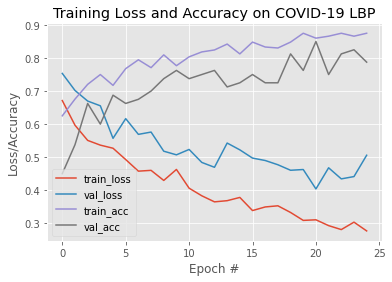

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 LBP")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [ ]:
# serialize the model to disk
# print("[INFO] saving COVID-19 detector model...")
# model.save("/content/drive/My Drive/COVID-CT/Models/lbpModel.h5")

[INFO] saving COVID-19 detector model...


In [ ]:
model_json = model.to_json()
with open("/content/drive/My Drive/COVID-CT/Models/lbpModel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("lbpModel.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
avg = (sum(H.history["val_loss"])/len(H.history["val_loss"]))

In [ ]:
avg

0.5743031811714172

In [ ]:
  avg = (sum(H.history["val_accuracy"])/len(H.history["val_accuracy"]))

NameError: ignored